## 자동 미분 기능
***
#### 자동 미분 기능의 스텝은 아래와 같다.

1. 미분 계산용 변수 정의 : requires_grad = True로 설정
2. 텐서 변수 간의 계산 : 내부에서 계산 그래프가 자동 생성
3. 계산 그래프 시각화 : make_dot 함수
4. 미분 계산 : backward 함수
5. 미분값 가져오기 : grad 속성
6. 미분값 초기화 : zero_ 함수

In [ ]:
import numpy as np
import torch

In [2]:
X = np.arange(-2, 2.1, 0.25)

In [3]:
X

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [4]:
### 미분 계산 대상 변수는 requires_grad = True로 설정
X = torch.tensor(X, requires_grad = True, dtype = torch.float32)

In [5]:
X

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)

In [6]:
y = 2 * X ** 2 + 2

In [7]:
y

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

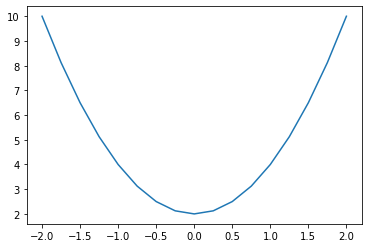

In [9]:
plt.plot(X.data, y.data)
plt.show()

In [10]:
z = y.sum()

In [11]:
z

tensor(85., grad_fn=<SumBackward0>)

In [ ]:
from torchviz import make_dot

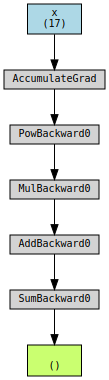

In [13]:
### 계산 그래프의 대상인 z, 미분 계산 대상의 변수 x
g = make_dot(z, params = {'x' : X})
display(g)

출발점 x를 텐서 변수로 설정하고 requires_grad 그래프를 지정하면 계산 과정이 자동으로 기록된다.

값을 계산해 나가며 계산 과정을 자동적으로 기록하는 기능을 Define by Run이라고 하는데 pytorch의 가장 큰 특징이다.

In [14]:
z.backward()

In [15]:
X.grad

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])

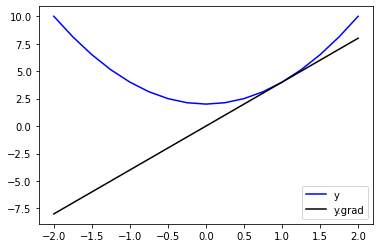

In [16]:
plt.plot(X.data, y.data, c = 'b', label = 'y')
plt.plot(X.data, X.grad.data, c = 'k', label = 'y.grad')
plt.legend()
plt.show()

In [17]:
y = 2 * X ** 2 + 2
z = y.sum()
z.backward()

X.grad

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])

In [18]:
### 미분 값을 초기화
X.grad.zero_()
X.grad

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
sigmoid = torch.nn.Sigmoid()

In [20]:
y = sigmoid(X)

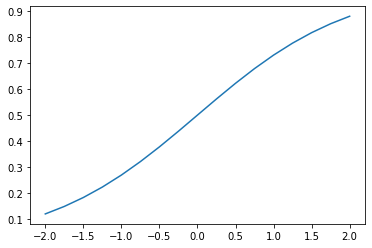

In [21]:
plt.plot(X.data, y.data)
plt.show()

In [22]:
z = y.sum()

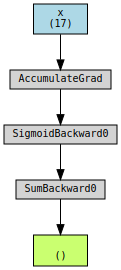

In [23]:
g = make_dot(z, {'x' : X})
display(g)

In [24]:
z.backward()

In [25]:
X.grad

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])

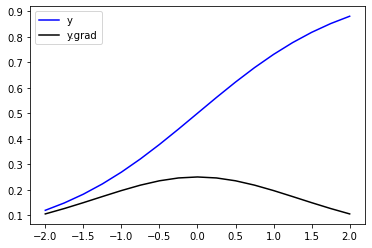

In [26]:
plt.plot(X.data, y.data, c = 'b', label = 'y')
plt.plot(X.data, X.grad.data, c = 'k', label = 'y.grad')
plt.legend()
plt.show()